# **Problem Statement**

The dataset comprises of the stats of different people who died during the tragedy of titanic ship incident in 1912.



Description of the features of the dataset:

**PassengerId** : Id of the passenger who boarded the ship

**Survived** : Whether this passenger survived or not.

**Pclass** : Class in which the passenger is travelling.

**Name** : Name of the passenger.

**Sex** : Sex of the Passenger.

**Age** : Age of the Passenger.

**SibSp** : Number of Sibling/Spouse.

**Parch** : Number of Parent or Children.

**Ticket** : Ticket Number.

**Fare** : Fare of the ticket.

**Cabin** : Cabin id.

**Embarkment** : Embarkment in which the passenger is travelling.

Task is to analyse the dataset, impute the missing values if necessary and design a model to predict whether the passenger will survive or not.


#Links to dataset:






# Importing the Libraries

Required libraries are imported and will be explained regarding the usage in subsequent topics.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing the Dataset

'train' variable stores the relevant training dataset.

In [0]:
path_dataset = '/content/drive/My Drive/'
train = pd.read_csv(path_dataset + 'train.csv')
test = pd.read_csv(path_dataset + 'test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Exploratory Data Analysis
We can see that some values in Age, Cabin and Embarkment are missing.

In [0]:
print('Training Set \n\n')
train.info()

Training Set 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Note :177 values of Age, 687 values of Cabin and 2 values in Embarkment are missing

In [0]:
def bar_charts(features):
    survived = train[train['Survived']==1][features].value_counts()
    dead = train[train['Survived']==0][features].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind = 'bar',stacked = True,figsize = (10,5))

The above bar_charts function describes the graphical representation of the column "features" with respect to number of people who survived the accident and the number of people who did not survived the accident.

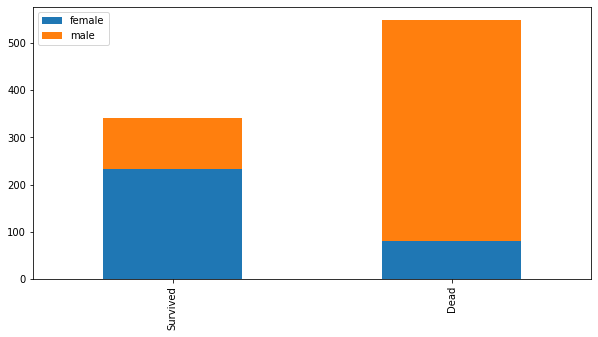

In [0]:
bar_charts('Sex')

We can see that most of the men died as compared to women. This is informative and we can conclude it from our domain knowledge of titanic accident also.

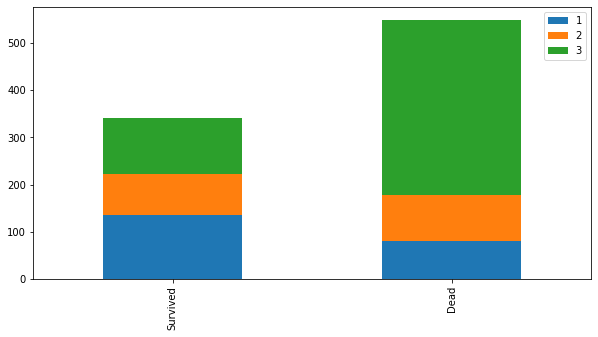

In [0]:
bar_charts('Pclass')

We can conclude that people who were travelling in third class are more prone to death as compare to first and second class. 

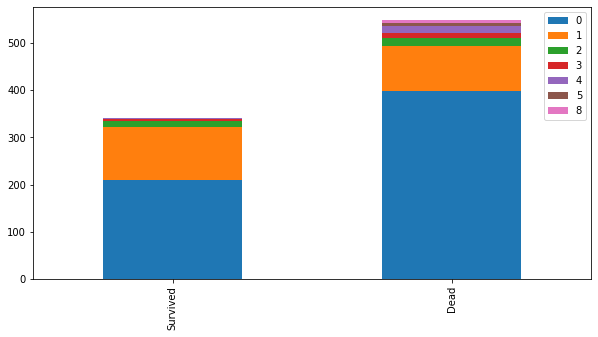

In [0]:
bar_charts('SibSp')

Here we can see that most of the people who were travelling without any siblings or spouse are dead and people who have more than one sibling or spouse have a high probability to survive.

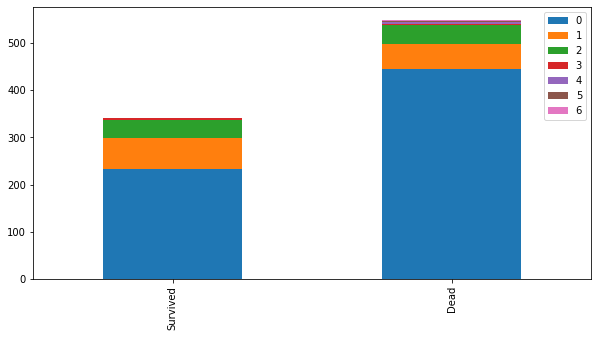

In [0]:
bar_charts('Parch')

Similar to previous information, we can see here that people who were travelling alone are dead as compared to people who are travelling with family.

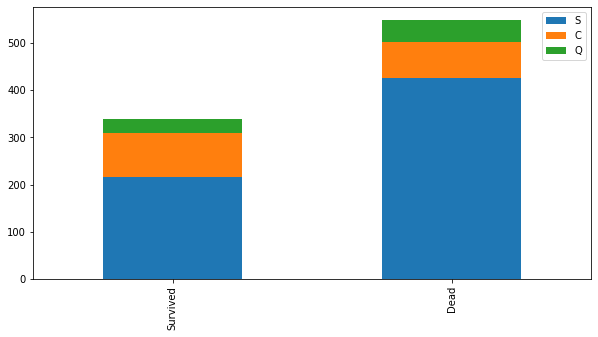

In [0]:
bar_charts('Embarked') 

Here we can see that most of the people of S embarkment are died. Not only this most of the people were travelling in the S embarkment so we can impute the Embarkment feature with 'S' embarkment.

#Feature Engineering

1) **Name** : We can see that there are some titles in the 'Name' feature. This is quite informative regarding the age of passengers. For example, Mr is referred to as adult, Master is referred to as male child, Mrs for female married and Miss for female unmarried. So we can use this information for imputing the 'Age' Column.

In [0]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


We can see the Title column is populated with all the titles.

In [0]:
train['Title'].value_counts()



Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Sir           1
Don           1
Countess      1
Lady          1
Mme           1
Jonkheer      1
Ms            1
Name: Title, dtype: int64

In [0]:
title_num = {"Mr":0,"Miss":1,"Master":2,"Mrs":3,"Dr":4,"Rev":4,"Col":0,"Mlle":4,"Major":0,"Ms":1,"Countess":4,"Don":4,"Mme":4,"Sir":0,"Lady":3,"Capt":0,"Jonkheer":4}    

train['Title'] = train['Title'].map(title_num)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


We have encoded the names into different bins based on the age categories

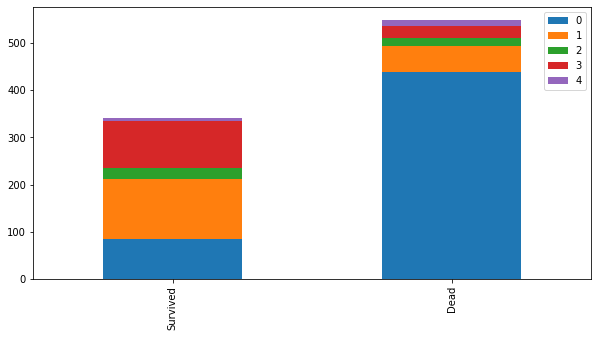

In [0]:
bar_charts('Title')

Mr (0) denotes most of the males in adult category have died. This plots clearly elucidates the factual information regarding age of survived and dead people.

In [0]:
train.drop(['Name'],axis=1,inplace = True)

2) **Sex** : Encoding the Sex feature into 1 and 0 values using LabelEncoder()

In [0]:
le = LabelEncoder()

train['Sex'] = le.fit_transform(train['Sex'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


3) **Age**: Imputing the Age feature using Title column by taking median of each bins separately.

In [0]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,0


4) **Embarked**: Since this feature has most of the 'S' Embarkments. So we will impute the missing values with 'S' and encode this feature.

In [0]:
train['Embarked'].fillna('S',inplace = True)
train['Embarked'] = le.fit_transform(train['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,0,3
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,0,35.0,1,0,113803,53.1000,C123,2,3
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,2,0


5) **Cabin**: Since Cabin feature in having more than 70% data missing we can simply drop it.

In [0]:
train.drop(['Cabin'],axis=1,inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,3
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,1
3,4,1,1,0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,1,35.0,0,0,373450,8.0500,2,0


6) **Ticket, PassengerId** seems to have negligible information with survival rates so we can discard it.

In [0]:
train.drop(['Ticket','PassengerId'],axis=1,inplace = True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_Size,F/P ratio
0,0,3,1,22.0,1,0,7.2500,2,0,2,2.416667
1,1,1,0,38.0,1,0,71.2833,0,3,2,71.283300
2,1,3,0,26.0,0,0,7.9250,2,1,1,2.641667
3,1,1,0,35.0,1,0,53.1000,2,3,2,53.100000
4,0,3,1,35.0,0,0,8.0500,2,0,1,2.683333


**Generating New Features**

---



1) **Family_Size** : Sum of Parch and SibSp + 1. Extra 1 is added to denote the alone traveller

In [0]:
train['Family_Size'] = train['Parch'] + train['SibSp'] + 1

2) **Fare/Pclass** :  We can see that fare is directly related to class of traveller. Hence this feature can be indirectly correlated with the survival chance of passengers.

In [0]:
train['F/P ratio'] = train['Fare']/train['Pclass']

**Correlation amongst features**

---



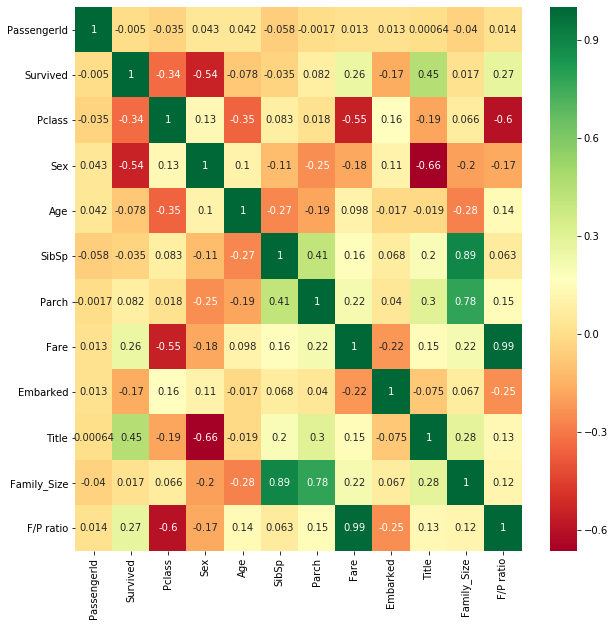

In [0]:
correlation = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True,cmap = 'RdYlGn')
plt.show()

Here we can see that all the features are having some correlations with the survived feature. Infact, two newly generated features namely Family_Size and F/P ratio also show some correlation with the survived feature. There correlation values are 0.017 and 0.27.

# **Model Training**

Splitting into training and validation sets.

In [0]:
X = train.iloc[:,1:]
y = train.iloc[:,0:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Scaling the features

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Logistic Regression Classifier**

---



In [0]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[115  24]
 [ 20  64]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


From the confusion matrix we can see that true positives and true negatives are 115 and 64 respectively, true negative and false positive are 24 and 20 respectively. Hence accuracy is (115+64)/223 = 0.8026 ie 80.26%

**Accuracy** : 80.26% 

**Random Forest Classifier**

---



In [0]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[129  10]
 [ 23  61]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


From the confusion matrix we can see that true positives and true negatives are 129 and 61 respectively, true negative and false positive are 10 and 23 respectively. Hence accuracy is (129+61)/223 = 0.8026 ie 85.20%

**Accuracy** : 85.20% 

Hence we can conclude that Random Forest Classifier is performing better with trivial parameters.

#**Hyperparameter tuning**

**k-fold cross validation**

---



It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

Here we wil be splitting the training and test data into k folds (here k=10). This parameter is controlled by cv parameter as described by the code below.

In [0]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

print('Accuracy : '+ str(accuracies.mean()) + '\n\n' + 'Standard deviation : '+ str(accuracies.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

Accuracy : 0.8069199457259157

Standard deviation : 0.021264517590136735


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


**Grid Search**

---

A model hyperparameter is a characteristic of a model that is external to the model and whose value cannot be estimated from data. Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions.

In this case three hyperparamters namely **n_estimators,max_depth,criterion** are being tuned to obtain the best possible value.

In [0]:

# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [15,17,19,21,22,23,25], 'max_depth': [2,3,4,5,6,7],'criterion':['gini','entropy']}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print(best_accuracy)
print(best_parameters)

0.8413173652694611
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 21}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


**Best Accuracy** : 84.13%

---



**Best Parameters**: n_estimators : 21, max_depth : 5, criterion : entropy

---

